In [1]:
#Import required packages
import ctd
import gsw
from ctd.read import _basename
import gsw
import requests
import os
import re
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the Plots pretty
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

#Set wd
os.chdir('/home/jovyan/ohw20-proj-ooi-profiles-section/ohw20-proj-ooi-profiles-section/')
os.getcwd()

'/home/jovyan/ohw20-proj-ooi-profiles-section/ohw20-proj-ooi-profiles-section'

## Read in data from 10/2019 using Stace's generated urls

In [2]:
# Provide URL to load a single file that has already been downloaded to OOI's OPENDAP server
# remember to use #fillmismatch
# Create directory that includes all urls
data_url = {}
data_url['inshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132326640Z-CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0003_CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191006T150003-20191031T212239.977728.nc#fillmismatch'
data_url['central_inshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132900316Z-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191007T210003-20191031T212442.986087.nc#fillmismatch'
data_url['central_offshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133142674Z-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191008T140003-20191031T212529.983845.nc#fillmismatch'
data_url['offshore'] = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133343088Z-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0012_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191013T160003-20191031T211622.990750.nc#fillmismatch'


## Load in the bathymetric data from the shelf

In [3]:
#Load in bathymetric data
bathymetry=xr.open_dataset('data/GMRT_39-41N_70-71W.nc')


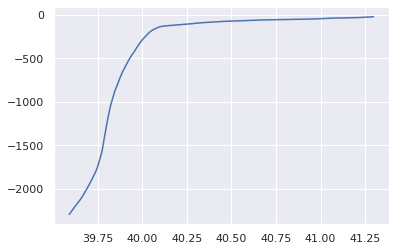

In [4]:
#Plot

#take the mean z across longitude (the moorings are essentially N-S oriented)
z=bathymetry.z.values.reshape([1023,535]).mean(axis=1)
#plt.imshow(z)
#plt.colorbar()

# #Get lat/lon range
# x=np.linspace(bathymetry.x_range[0],bathymetry.x_range[1],535)
y=np.linspace(bathymetry.y_range[1],bathymetry.y_range[0],1023)


#Initial plot of depth values
plt.plot(y,z)

## Taken from Kelly's code to plot a single day

In [5]:
#Extract a single time for a single day and plot all side by side
I_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132326640Z-CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0003_CP03ISPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191006T150003-20191031T212239.977728.nc#fillmismatch'
CI_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T132900316Z-CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCI-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191007T210003-20191031T212442.986087.nc#fillmismatch'
CO_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133142674Z-CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0013_CP02PMCO-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191008T140003-20191031T212529.983845.nc#fillmismatch'
O_URL = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sbeaulieu@whoi.edu/20200806T133343088Z-CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered/deployment0012_CP04OSPM-WFP01-03-CTDPFK000-recovered_wfp-ctdpf_ckl_wfp_instrument_recovered_20191013T160003-20191031T211622.990750.nc#fillmismatch'

In [6]:
ids = xr.open_dataset(I_URL)
cids = xr.open_dataset(CI_URL)
cods = xr.open_dataset(CO_URL)
ods = xr.open_dataset(O_URL)

In [7]:
ids = ids.swap_dims({'obs': 'time'}) #Swap dimensions
cids = cids.swap_dims({'obs': 'time'}) #Swap dimensions
cods = cods.swap_dims({'obs': 'time'}) #Swap dimensions
ods = ods.swap_dims({'obs': 'time'}) #Swap dimensions


## Select a single time slice 

In [8]:
# select same day for each profiler
ids15=ids[['ctdpf_ckl_seawater_pressure','ctdpf_ckl_seawater_temperature','practical_salinity']].sel(time="2019-10-15T03", method="nearest")
cids15=cids[['ctdpf_ckl_seawater_pressure','ctdpf_ckl_seawater_temperature','practical_salinity']].sel(time="2019-10-15T03", method="nearest")
cods15=cods[['ctdpf_ckl_seawater_pressure','ctdpf_ckl_seawater_temperature','practical_salinity']].sel(time="2019-10-15T03", method="nearest")
ods15=ods[['ctdpf_ckl_seawater_pressure','ctdpf_ckl_seawater_temperature','practical_salinity']].sel(time="2019-10-15T03", method="nearest")


In [9]:
ids15

<xarray.Dataset>
Dimensions:                         (time: 801)
Coordinates:
  * time                            (time) datetime64[ns] 2019-10-15T03:00:02...
    lat                             (time) float64 ...
    pressure                        (time) float64 ...
    lon                             (time) float64 ...
    obs                             (time) int32 51980 51981 ... 52779 52780
Data variables:
    ctdpf_ckl_seawater_pressure     (time) float64 ...
    ctdpf_ckl_seawater_temperature  (time) float64 ...
    practical_salinity              (time) float64 ...
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:23:41.238357
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:23:41.238351
    id:                              CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     607b59bd-cfc8-4659-868c-a894a197fb41
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    license:                         
    contributor_name:                
    uuid:                            607b59bd-cfc8-4659-868c-a894a197fb41
    creator_name:                    Ocean Observatories Initiative
    title:                           Data produced by Stream Engine version 1...
    sensor:                          03-CTDPFK000
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    acknowledgement:                 
    Conventions:                     CF-1.6
    project:                         Ocean Observatories Initiative
    source:                          CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    publisher_url:                   http://oceanobservatories.org/
    creator_url:                     http://oceanobservatories.org/
    nodc_template_version:           NODC_NetCDF_TimeSeries_Orthogonal_Templa...
    subsite:                         CP03ISPM
    processing_level:                L2
    history:                         2020-08-06T13:23:41.238281 generated fro...
    time_coverage_start:             2019-10-06T15:00:03
    time_coverage_end:               2019-10-31T21:22:39.977728
    time_coverage_resolution:        P13.80S
    geospatial_lat_min:              40.364817
    geospatial_lat_max:              40.364817
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       0.1
    geospatial_lon_min:              -70.888668
    geospatial_lon_max:              -70.888668
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       0.1
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  0.1
    geospatial_vertical_positive:    down
    DODS.strlen:                     18
    DODS.dimName:                    string18
    DODS_EXTRA.Unlimited_Dimension:  obs

In [10]:
#Merge into a single dataframe
xr.concat([ids15,cids15,cods15,ods15],dim="space",fill_value='nan')

<xarray.Dataset>
Dimensions:                         (space: 4, time: 4949)
Coordinates:
  * time                            (time) datetime64[ns] 2019-10-15T03:00:02...
    lat                             (space, time) object 40.36 'nan' ... 39.94
    pressure                        (space, time) object 6.415e+03 ... 4.206e+04
    lon                             (space, time) object -70.89 'nan' ... -70.88
    obs                             (space, time) object 51980 'nan' ... 17896
Dimensions without coordinates: space
Data variables:
    ctdpf_ckl_seawater_pressure     (space, time) object 54.15 'nan' ... 410.6
    ctdpf_ckl_seawater_temperature  (space, time) object 20.46 'nan' ... 9.674
    practical_salinity              (space, time) object 35.31 'nan' ... 35.28
Attributes:
    _NCProperties:                   version=1|netcdflibversion=4.6.1|hdf5lib...
    node:                            WFP01
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               recovered_wfp
    stream:                          ctdpf_ckl_wfp_instrument_recovered
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-06T13:23:41.238357
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-06T13:23:41.238351
    id:                              CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    requestUUID:                     607b59bd-cfc8-4659-868c-a894a197fb41
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    license:                         
    contributor_name:                
    uuid:                            607b59bd-cfc8-4659-868c-a894a197fb41
    creator_name:                    Ocean Observatories Initiative
    title:                           Data produced by Stream Engine version 1...
    sensor:                          03-CTDPFK000
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    acknowledgement:                 
    Conventions:                     CF-1.6
    project:                         Ocean Observatories Initiative
    source:                          CP03ISPM-WFP01-03-CTDPFK000-recovered_wf...
    publisher_url:                   http://oceanobservatories.org/
    creator_url:                     http://oceanobservatories.org/
    nodc_template_version:           NODC_NetCDF_TimeSeries_Orthogonal_Templa...
    subsite:                         CP03ISPM
    processing_level:                L2
    history:                         2020-08-06T13:23:41.238281 generated fro...
    time_coverage_start:             2019-10-06T15:00:03
    time_coverage_end:               2019-10-31T21:22:39.977728
    time_coverage_resolution:        P13.80S
    geospatial_lat_min:              40.364817
    geospatial_lat_max:              40.364817
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       0.1
    geospatial_lon_min:              -70.888668
    geospatial_lon_max:              -70.888668
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       0.1
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  0.1
    geospatial_vertical_positive:    down
    DODS.strlen:                     18
    DOD

## Visualize Profile Slice with bathymetry

(500.0, 0.0)

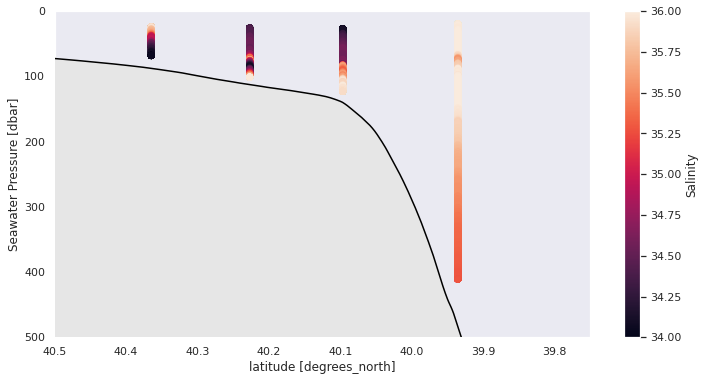

In [12]:
#Visualize
figsize=(12, 6)
fig, ax= plt.subplots(figsize=figsize)

cci=ids15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=ids15.practical_salinity.data, vmin=34.0,vmax=36.0)


ccci=cids15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=cids15.practical_salinity.data, vmin=34.0,vmax=36.0)


ccco=cods15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=cods15.practical_salinity.data, vmin=34.0,vmax=36.0)

cco=ods15.plot.scatter(x="lat", y="ctdpf_ckl_seawater_pressure", c=ods15.practical_salinity.data, vmin=34.0,vmax=36.0)

cco.set_clim(34.0,36.0)

#Add colorbar
plt.colorbar(cco,label='Salinity',cmap='hot')


######### =======  Bathymetry
z=bathymetry.z.values.reshape([1023,535]).mean(axis=1)

# #Get lattitude range
y=np.linspace(bathymetry.y_range[1],bathymetry.y_range[0],1023)


#Convert to z to p
p=gsw.p_from_z(z,y)

# #PLot bathymetry line
plt.plot(y,p,color="black", linewidth=1.5, zorder=3)
plt.fill_between(y,p, y2=p.max(), color="0.9", zorder=3)

#Remove grid
plt.grid(False)

#Flip x and y axes
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlim(40.5,39.75)
plt.ylim(500,0)


## Ultimate Goal
Write a function that takes in a dataframe with nx4xt observations, where 
n=maximum number of depth points
4=number of mooring profilers
t=number of time steps observed





In [ ]:
#Merge data

ValueError: x and y must have same first dimension, but have shapes (1023,) and (535,)

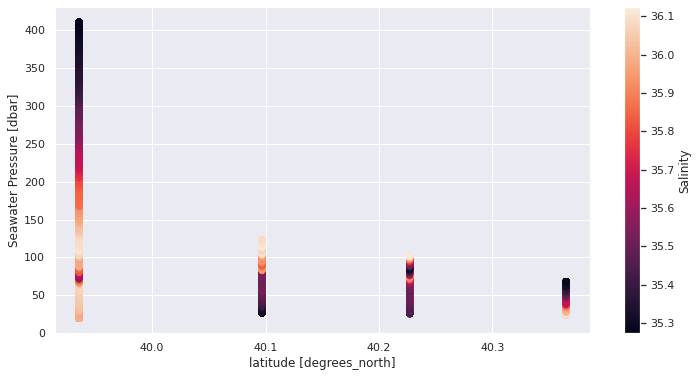